In [20]:
!pip install seaborn==0.11.0

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [21]:
!git clone https://github.com/cnclabs/smore.git
!cd smore && make 

fatal: destination path 'smore' already exists and is not an empty directory.
( cd src; make )
make[1]: Entering directory `/home/ec2-user/SageMaker/log-anomaly-detection/smore/src'
mkdir -p ../bin
ar rcs ../bin/libproNet.a util.o random.o proNet.o ./model/DeepWalk.o ./model/Walklets.o ./model/LINE.o ./model/HPE.o ./model/APP.o ./model/MF.o ./model/BPR.o ./model/HBPR.o ./model/NEMF.o ./model/WARP.o ./model/NERANK.o ./model/ECO.o ./model/GCN.o ./model/TEXTGCN.o ./model/TEXTGCNdev.o
make[1]: Leaving directory `/home/ec2-user/SageMaker/log-anomaly-detection/smore/src'
( cd cli; make all )
make[1]: Entering directory `/home/ec2-user/SageMaker/log-anomaly-detection/smore/cli'
make[1]: Nothing to be done for `all'.
make[1]: Leaving directory `/home/ec2-user/SageMaker/log-anomaly-detection/smore/cli'


In [28]:
import pandas as pd 

df_sim = pd.read_csv('record_full.csv', header=None)
# df_sim = df_sim[((df_sim[0]) & (df_sim[1] <=400))]

df_sim = df_sim.fillna('normal')
df_sim.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5
0,0,1,0.841209,0.982795,registration,check_info
1,0,2,0.858921,0.101553,registration,enter_uboot
2,0,3,1.000000,0.033991,registration,enter_uboot
3,0,4,0.836641,0.981116,registration,normal
4,0,5,0.822422,0.976081,registration,normal


In [29]:
df_sim['weight'] = df_sim.apply(lambda x: min(x[3], x[2]), axis=1)

In [30]:
df_sim_passed = df_sim[(df_sim[4]=='normal') & (df_sim[5]=='normal')]
df_sim_passed['weight'].mean(), df_sim_passed['weight'].std()

(0.9708527132448966, 0.016965089584791954)

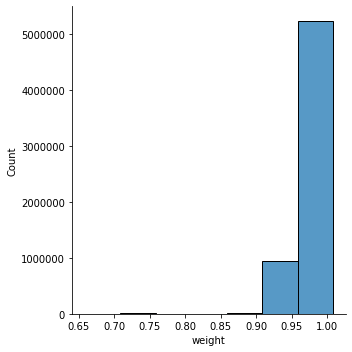

In [31]:
import seaborn as sns
sns.displot(df_sim_passed['weight'], binwidth = 0.05)

In [51]:
df_g = df_sim_passed.groupby([1]).mean()
df_g_f = df_g[df_g['weight']<0.9]
df_g_f

,0,2,3,weight
1,,,,
330,188.272374,0.733936,0.978161,0.733936
372,211.060201,0.724960,0.966106,0.724771
990,525.681063,0.737835,0.980867,0.737835


In [33]:
df_sim_half = df_sim[((df_sim[4]=='normal') & (df_sim[5]!='normal')) | ((df_sim[4]!='normal') & (df_sim[5]=='normal'))]
df_sim_half['weight'].mean(), df_sim_half['weight'].std()

(0.29568540265565607, 0.33308171542995785)

In [34]:
df_g = df_sim[((df_sim[4]=='normal') & (df_sim[5]!='normal'))].groupby([1]).mean()
df_g_f = df_g[df_g['weight']>0.9]
df_g_f

,0,2,3,weight
1,,,,
34,17.375000,0.975009,0.955847,0.955847
35,17.375000,0.985127,0.935828,0.935828
37,18.470588,0.980125,0.950100,0.950100
40,19.555556,0.983890,0.933008,0.933008
44,20.684211,0.971613,0.951812,0.951812
48,24.136364,0.973900,0.932408,0.932408
52,27.240000,0.953015,0.956200,0.950991
86,43.380952,0.962202,0.944899,0.944868
87,43.380952,0.975119,0.943525,0.943525


In [35]:
df_sim[(df_sim[1]==34) & (df_sim[4]=='normal')]

,0,1,2,3,4,5,weight
17827,4,34,0.976757,0.970666,normal,check_info,0.970666
22273,5,34,0.976031,0.959169,normal,check_info,0.959169
26718,6,34,0.988742,0.963586,normal,check_info,0.963586
31162,7,34,0.983294,0.963105,normal,check_info,0.963105
35605,8,34,0.976575,0.967566,normal,check_info,0.967566
44488,10,34,0.985473,0.960476,normal,check_info,0.960476
53367,12,34,0.974578,0.963932,normal,check_info,0.963932
66678,15,34,0.988015,0.963580,normal,check_info,0.963580
84412,19,34,0.961140,0.958407,normal,check_info,0.958407
93273,21,34,0.981660,0.963636,normal,check_info,0.963636


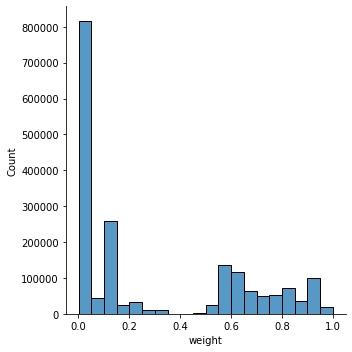

In [36]:
import seaborn as sns
sns.displot(df_sim_half['weight'], binwidth = 0.05)


In [37]:
graph_df = df_sim[[0,1,'weight']]
graph_df

,0,1,weight
0,0,1,0.841209
1,0,2,0.101553
2,0,3,0.033991
3,0,4,0.836641
4,0,5,0.822422
...,...,...,...
8195975,2601,2826,0.100257
8195976,2601,2827,0.102704
8195977,2601,2828,0.103247
8195978,2601,2829,0.100291


In [40]:
graph_f = open("graph.txt", 'w')

for index, row in graph_df.iterrows():
    graph_f.write(str(row[0])+" "+str(row[1])+" "+str(row['weight']))
    graph_f.write("\n")



In [41]:
!smore/cli/deepwalk -train graph.txt -save rep.txt -undirected 1 -dimensions 128 -walk_times 10 -walk_steps 40 -window_size 3 -negative_samples 15 -alpha 0.025 -threads 1

Connections Preview:
	# of connection:	8195866ion:	820000nnection:	2010000 of connection:	2800000000:	437000050000on:	6340000nnection:	7130000
Connections Loading:
	Progress:		100.00 %
	# of vertex:		4452
Build the Alias Method:
	Reconstructing Graph ...
	Building Alias Tables ...
	Finished.
Model Setting:
	dimension:		128
Model:
	[DeepWalk]
Learning Parameters:
	walk_times:		10
	walk_steps:		40
	window_size:		3
	negative_samples:	15
	alpha:			0.025
	workers:		1
Start Training:
	Alpha: 0.002538	Progress: 100.00 %
Save Model:
	Save to <rep.txt>


In [42]:
all_df = pd.read_pickle('AP1_aws_data.pkl')
all_df.head()

,mac,test_starttime,test_result,error_function,ip_label,logtext
0,68d79a3a7c93,2021-01-19 18:42:18,Fail,registration,foxconn,\n\n[XCD 2021-01-19 10:42:18] Version file /ho...
1,68d79a3a7c93,2021-01-19 18:36:38,Fail,check_info,foxconn,\n\n[XCD 2021-01-19 10:36:38] Version file /ho...
2,68d79a3a8347,2021-01-19 18:33:17,Fail,enter_uboot,foxconn,\n\n[XCD 2021-01-19 10:33:17] Version file /ho...
3,68d79a3a8347,2021-01-19 18:27:58,Fail,enter_uboot,foxconn,\n\n[XCD 2021-01-19 10:27:58] Version file /ho...
4,68d79a3a7d57,2021-01-19 18:27:32,Pass,,foxconn,\n\n[XCD 2021-01-19 10:27:32] Version file /ho...


In [44]:
import numpy as np 
vecs = open('rep.txt', 'r')
vectors_to_visualize = [] 
error_labels = [] 

for i, v in enumerate(vecs.readlines()):
    if i ==0:
        continue 
    toks = v.split(' ')
    nidx = toks[0]
    cv = [] 
    for i in range(1, len(toks)):
        cv.append(float(toks[i]))
    vectors_to_visualize.append(np.asarray(cv))
    error = all_df.iloc[int(float(nidx))]['error_function']

    if error.strip() == '':
        error = 'normal'
    error_labels.append(error)
    
    
    


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

vectors_to_visualize = np.asarray(vectors_to_visualize)                
print(vectors_to_visualize)
pca = TSNE(n_components=2, verbose=0, perplexity=50, n_iter_without_progress=300, n_iter=2000)
pca_result = pca.fit_transform(vectors_to_visualize)
d = {} 
d['pca-1'] = pca_result[:,0]
d['pca-2'] = pca_result[:,1]
d['error_labels'] = error_labels

df = pd.DataFrame(data=d)



[[ 0.185383    0.14764     0.0291128  ... -0.155894    0.00067647
  -0.118768  ]
 [ 0.182639    0.145071    0.0263561  ... -0.161533   -0.00366368
  -0.117213  ]
 [ 0.181302    0.144927    0.0307382  ... -0.159507   -0.00053626
  -0.117161  ]
 ...
 [ 0.17827     0.146464    0.0298001  ... -0.162202   -0.00190775
  -0.114709  ]
 [ 0.181139    0.1459      0.0264201  ... -0.155562   -0.00459316
  -0.116564  ]
 [ 0.182572    0.146067    0.0240293  ... -0.159801    0.00264396
  -0.116487  ]]


In [49]:
df.head()

,pca-1,pca-2,error_labels
0,-4.460622,-1.550439,registration
1,-1.971917,3.528204,check_info
2,1.195332,-0.851194,enter_uboot
3,-1.396931,-1.306215,enter_uboot
4,-3.404370,-1.953721,normal


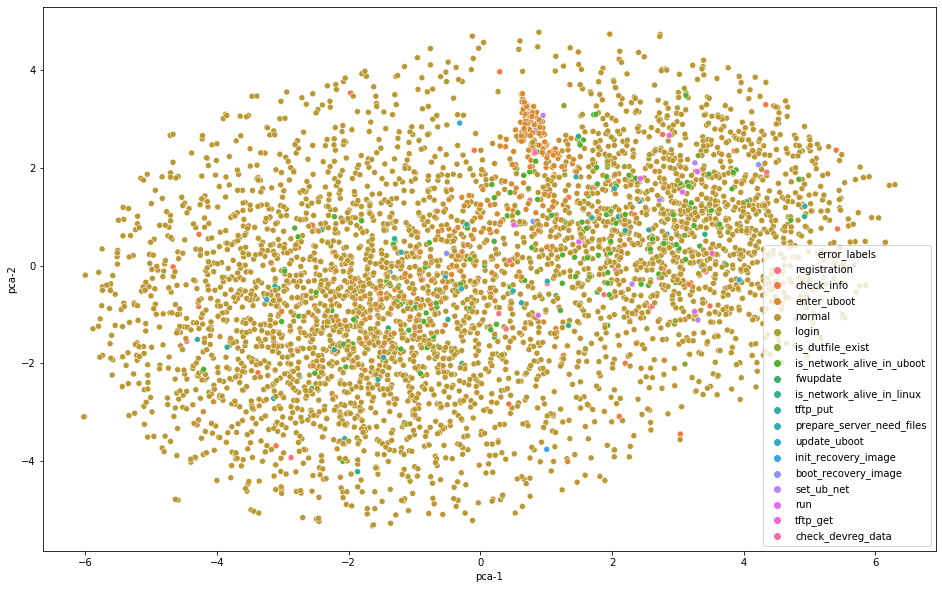

In [50]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="error_labels",
    data=df,
    legend="full",
    alpha=1
)

# errors= list(set(error_labels))
# e_dict = {} 

# for i, e in enumerate(errors): 
#     e_dict[e] = i+1

# print(e_dict)    
# c = []
# for e in error_labels:
#     c.append(e_dict[e])

# fig, ax = plt.subplots(figsize=(16,10))
# scatter = ax.scatter(df['pca-1'], df['pca-2'], c=c)
# legend1 = ax.legend(*scatter.legend_elements(num=7),
#                     loc="lower left", title="errors")
# ax.add_artist(legend1)

# for i in range(0, len(df)):
#     if i == 330: 
#         ax.annotate(i, (df['pca-1'][i], df['pca-2'][i]))
    